0. Judul dan tabel kontribusi setiap anggota.
1. Identifikasi masalah yang jelas.
2. Tujuan model dan simulasi.
3. Metode yang dijabarkan dengan jelas, berikut algoritma yang digunakan. 
4. Hasil komputasi/simulasi model dan visualisasi. 
5. Analisis hasil dan Evaluasi
6. Kesimpulan. 
7. Link lampiran program yang dapat diakses dan diperiksa dosen (availabel sampai April 2023). Jika tidak dapat diakses dosen, maka laporan dianggap tidak lengkap yang tentunya akan mengurangi nilai. 

Kelompok 9: Saham - TLKM

Anggota:
1. Rifky Aulia Putra Purwanto - 1301203245
2. Nur Afina Rahmani - 1301202563
3. Wandi Yusuf Kurniawan - 1301218601

## Pergerakan Saham

In [7]:
# !pip install yfinance
# !pip install pandas-datareader
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr

In [15]:
ytlkm = yf.Ticker("TLKM.JK")

# get historical market data
hist = ytlkm.history(start="2022-01-01", end="2022-02-01")
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2022-01-03 00:00:00+07:00 to 2022-01-31 00:00:00+07:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          21 non-null     float64
 1   High          21 non-null     float64
 2   Low           21 non-null     float64
 3   Close         21 non-null     float64
 4   Volume        21 non-null     int64  
 5   Dividends     21 non-null     float64
 6   Stock Splits  21 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.3 KB


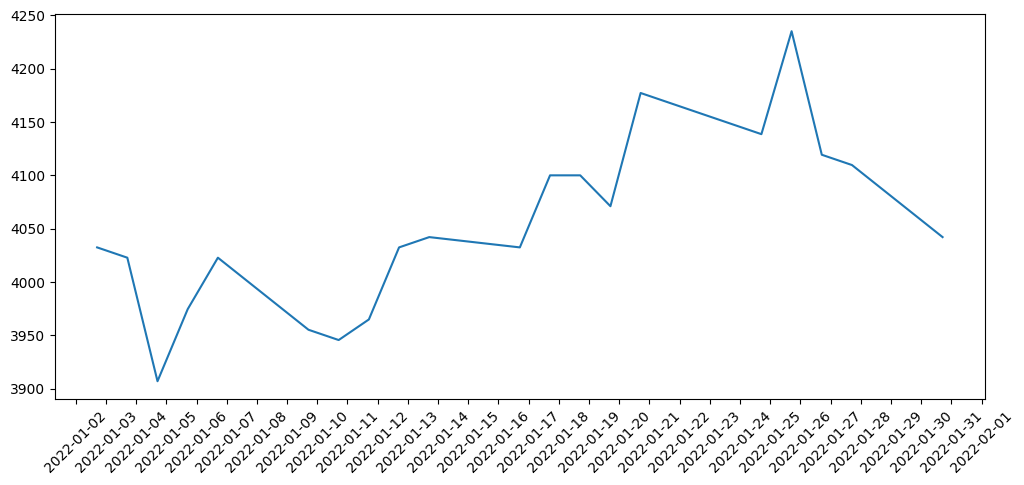

In [16]:
fig,ax = plt.subplots(1, figsize=(12,5))
ax.plot(hist['Close'])

ax.xaxis.set_major_locator(mdates.DayLocator())  # Set tick locator for days
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Set date format

plt.xticks(rotation=45) 

plt.show()

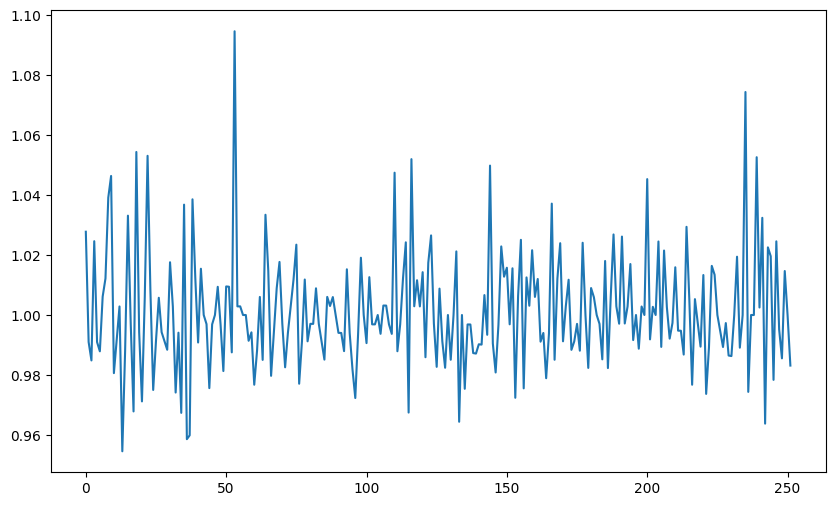

mean, std up 1.0182876659861713 0.016233302405725045
mean, std down 0.9891553874750597 0.009739999547394131
u,d,p= 1.0182876659861713 0.9891553874750597 0.4166666666666667
varoansi log saham($sigma^2t$)= 0.07966141459764883


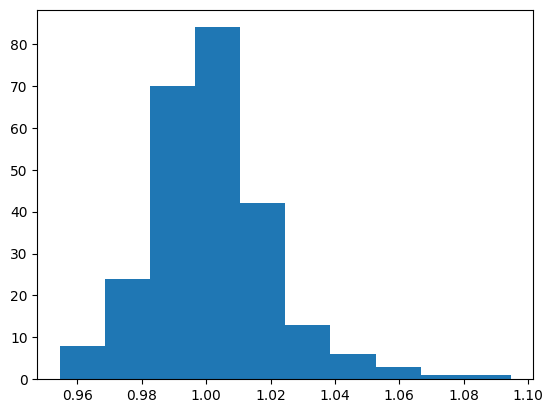

In [ ]:
# estimasi parameter metode empiris 
hist['return'] = [hist.Close[i]/hist.Close[i-1] for i in range(1,len(hist))]+[0]
ret = np.array(hist['return'][0:int(len(hist)/2)])
fig,ax = plt.subplots(1,figsize=(10,6))
ax.plot(ret)
plt.show()
print('mean, std up', np.mean(ret[ret>1]), np.std(ret[ret>1]))
print('mean, std down',np.mean(ret[ret<=1]), np.std(ret[ret<=1]))
plt.hist(ret, bins=10)
up= np.mean(ret[ret>1]) # estimasi nilai u empiris
dwn = np.mean(ret[ret<=1])# estimasi nilai d emspiris
p_empi = len(ret[ret>1])/len(ret)
avret = np.mean(ret)
print('u,d,p=', up,dwn,p_empi)
# sigm=(ret-avret)**2

# estimasi MOdel CRR sigma
logS= np.log(np.array([hist.Close[i] for i in range(0,int(len(hist)/2))]))
print('varoansi log saham($sigma^2t$)=', np.std(logS))
sig = np.sqrt(np.std(logS)/1)# volatilitas harga saham

In [ ]:
import math
# Estimasi nilai sigma dari log(S)
hist['logs'] = [np.log(k) for k in hist['Close']]
logs = np.array(hist['logs'])[0:int(len(hist)/2)+1] 
varLogs=np.std(logs)**2 #\sigma^2t
sigEst= np.sqrt(varLogs/1)
print(len(hist['logs'][int(len(hist)/2)+1:-1]))

251


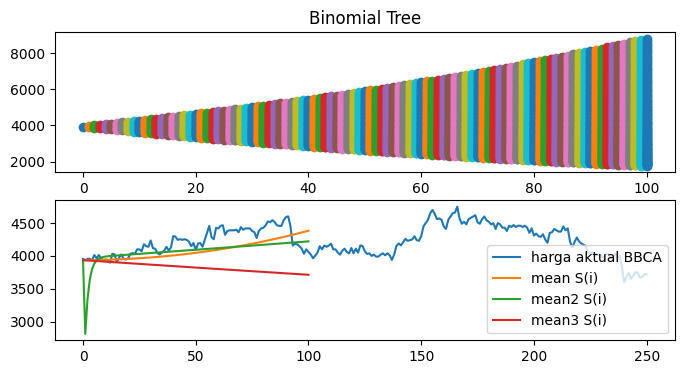

In [ ]:
# Membuat pohon Binomial Saham
So = hist.Close[int(len(hist)/2)]
sig = sigEst
r = 0.055 # suku bunagn bank Indonesia
N = 100#251 # harian dalam satu tahun
dt = 1/N
u=np.exp(sig*np.sqrt(dt))
d=1/u
p=(np.exp(-r*dt)-d)/(u-d)

fig,ax = plt.subplots(2,figsize=(8,4))
price = np.zeros((N+1,N+1), float)
mean_si = np.zeros((N+1), float)
mean2_si = np.zeros((N+1), float)
mean3_si = np.zeros((N+1), float)
mean_si[0] = So
mean2_si[0] = So
mean3_si[0] = So
price[0,N] = So
ax[0].scatter(0, price[0,N])
ax[1].plot(range(len(hist.Close[int(len(hist)/2)+1:-1])), hist.Close[int(len(hist)/2)+1:-1], label='harga aktual BBCA')
for i in range(1,N+1): # time step 
  for j in reversed(range(i+1)): # jumlah kenaikan
    price[j,i] = So*u**(j)*d**(i-j)
  ax[0].scatter([i for k in range(len(price[0:i+1,i]))], price[0:i+1,i])
  mean_si[i] = np.mean(price[0:i+1,i])
  prob = np.array([math.comb(i+1, i+1-k)*p**(i+1-k)*(1-p)**k for k in range(i+1)])
  # print(prob.shape,price[0:i+1,i].shape )
  mean2_si[i] = np.sum(price[0:i+1,i]*prob) 
  mean3_si[i] = So*u**(i*p)*d**(i-i*p)
    # print(price[j,i])
    # print(j)
ax[0].set_title("Binomial Tree")
ax[1].plot(mean_si, label='mean S(i)')
ax[1].plot(mean2_si, label='mean2 S(i)')
ax[1].plot(mean3_si, label='mean3 S(i)')
plt.legend()

In [ ]:
a = np.array([i for i in range(3)])
b = np.array([i for i in reversed(range(3))])
a*b
print(a.shape, b.shape)

(3,) (3,)


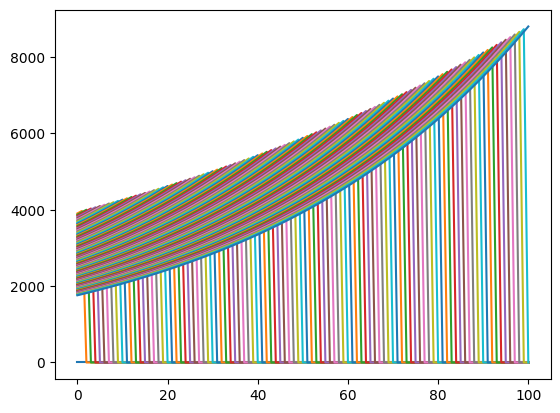

In [ ]:
plt.plot(price)
plt.show()

## Monte Carlo Simulation in Financial Stock Model

### Binomial Model for Stock Price
Suppose that discrete time step for a time interval $[0,T]$ is $\{t_0=0, t_1, t_2, \cdots, t_N=T\}$, where $|t_{i+1}-t_{i}|$ are equidistance for all $i$, that is $\Delta t = \frac{T}{N}$. 
Assume that for every time step, stock price can only go up with probability $p$ or down with probability $1-p$. And it has fixed factors for going up or down, respectively are $u$ and $d$.

If at $t_0$, the stock price is $S_0$, then at $t_N$ the stock price will be following the binomial distribution, $x~Binom(x;N,p)$ with $x$ here is the number of $S_0$ going up during $\{t_0=0, t_1, t_2, \cdots, t_N=T\}$. And stock price $S(t_N)$ is written as: 

$S(t_N)=S_N = S_0 u^x d^{N-x}, $ with probability $P(X=x) = \binom{N}{x} p^x (1-p)^{N-x}$ 

#### WHat are the parameters $p,u,$ and $d$?
$p = \frac{e^{-r\Delta t }-d}{u-d} $ 

$u = e^{\sigma \sqrt{\Delta t}}$

$d = e^{-\sigma \sqrt{\Delta t}}$ 

where $r$ is risk free interest rate, and $\sigma$ is the risk of stock return. 

### Stock Price Model at a given time step (Bernouli)
After $\Delta t$, $S(t)$ assume to change following Brown Motion 

In [ ]:
# MOnte carlo simulation per time steps (Bernouli event for every time step)
so=10
T=1
N=10
dt=T/N
r = 0.055 # suku bunagn bank Indonesia
sig = 0.15
u=np.exp(sig*np.sqrt(dt))
d=1/u
p=(np.exp(-r*dt)-d)/(u-d)
M=20
smt = [[]]
for k in range(M):
  s=so
  sv=[s]
  for i in range(N):
    x=np.random.binomial(N,p)
    s=s*u**(x)*d**(1-x)
    sv=sv+[s]
  smt =smt+[sv] 

smt=[k for k in smt[1:][:]]  

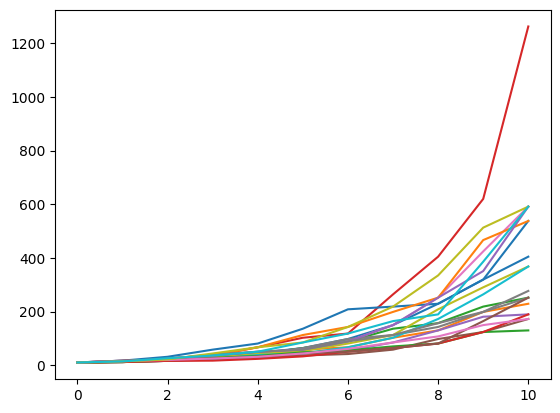

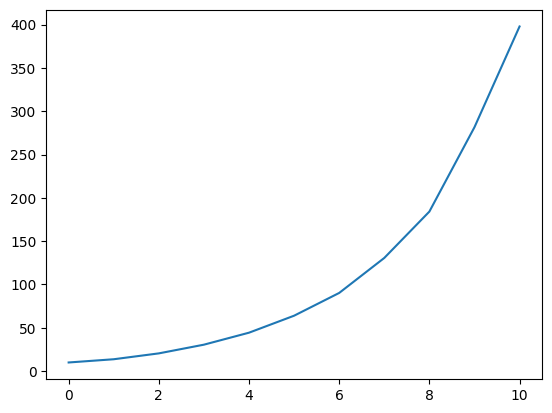

In [ ]:
[plt.plot(k) for k in smt]
plt.show()
## Average path of stock prices
smean=np.mean(np.array(smt), axis=0)
plt.plot(smean)

In [ ]:
# Binomial Tree
so=10
T=1
N=10
dt=T/N
r = 0.06 
sig = 0.15
u=np.exp(sig*np.sqrt(dt))
d=1/u
p=(np.exp(-r*dt)-d)/(u-d)
M=20
smt = [[]]
for k in range(M):
  s=so
  sv=[s]
  for i in range(N):
    x=np.random.binomial(N,p)
    s=s*u**(x)*d**(1-x)
    sv=sv+[s]
  smt =smt+[sv] 

smt=[k for k in smt[1:][:]]  

In [ ]:
## MOnte Carlo Simulation 